One of the most used methods to numerically find the minimimum (or maximum) of a funciont is [Gradient Descent](en.wikipedia.org/wiki/Gradient_descent). Using this method, the process of minimizing the loss function in machine learning algorithms (such as linear regression and logistic regression) occurs in an iterative way. At each iteration, a small change is made to the components of the $\Theta$ parameter vector.

# A Toy Example

Let us implement a vanilla version of Gradient Descent. Concretely, let us use the Gradient Descent algorithm to find the minimum of the following function.

$$
f(x) = (x+5)^2
$$

The derivative of this function (a scalar function in this case) is easily computed. Let us call this derivative $f^\prime$. Then:

$$
f^\prime(x) = (x+5)
$$


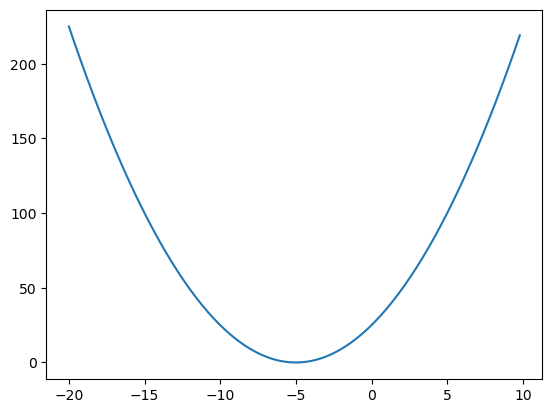

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# evenly sampled points
t = np.arange(-20., +10., 0.2)

f = lambda x: (x+5) * (x+5)

plt.plot(t, f(t))
plt.show()

By visually inspecting the graph presented above, we can see that the minimum of our function $f$ is at -5. But let us see Gradient Descent algorithm finding this value.
Let us first define all the need variables for the algotithm implementation.

In [35]:
# Learning rate
rate = 0.01

df = lambda x: 2*(x+5) # Gradient of our function

Now we can implement Gradient Descent. See below.

In [36]:
def gradient_descent(initial_value: float, learning_rate: float):
    # This tells us when to stop the algorithm
    precision = 0.000001

    previous_step_size = 1 #

    cur_theta = initial_value
     
    # maximum number of iterations
    max_iters = 10000

    iters = 0 #iteration counter

    loss_dict = dict()

    while previous_step_size > precision and iters < max_iters:
        prev_theta = cur_theta #Store current x value in prev_theta
        cur_theta = cur_theta - learning_rate * df(prev_theta) #Grad descent
        previous_step_size = abs(cur_theta - prev_theta) #Change in theta
        iters = iters + 1 #iteration count
        loss_dict[iters] = cur_theta
    
    return cur_theta, loss_dict

In [37]:
cur_theta, loss_dict = gradient_descent(initial_value=3, learning_rate=rate)
print("The local minimum occurs at", cur_theta)

The local minimum occurs at -4.9999518490318176


For debugging purposes, we can plot the plot the loss values along the iteration of Gradient Descent.

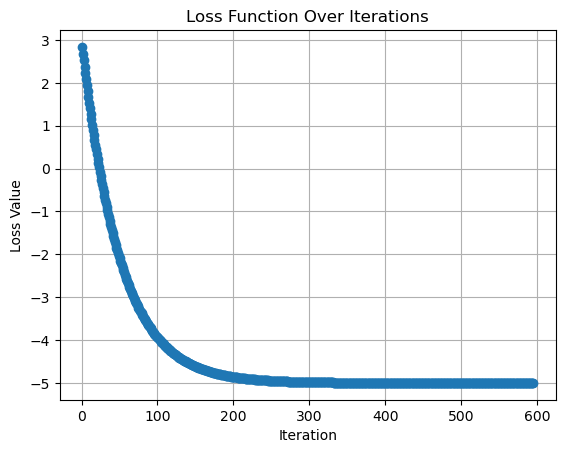

In [38]:
import matplotlib.pyplot as plt

# Extract keys (iterations) and values (loss) from the dictionary
iterations = list(loss_dict.keys())
loss_values = list(loss_dict.values())

# Create a line plot
plt.plot(iterations, loss_values, marker='o', linestyle='-')
plt.title('Loss Function Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss Value')
plt.grid(True)

# Show the plot (or save it to a file using plt.savefig())
plt.show()

As a sanity check, let us run our implementation using different stating points.

In [39]:
# generate some Gaussian values
from numpy.random import randn
values = randn(10)
for initial_value in values:
    cur_theta, _ = gradient_descent(initial_value=3, learning_rate=rate)
    print(f"Starting at {initial_value}, the local minimum occurs at {cur_theta}")

Starting at 1.0819003739523292, the local minimum occurs at -4.9999518490318176
Starting at 0.9027892729084664, the local minimum occurs at -4.9999518490318176
Starting at -0.01810565808845785, the local minimum occurs at -4.9999518490318176
Starting at 0.2667141443940579, the local minimum occurs at -4.9999518490318176
Starting at 0.8331696032882074, the local minimum occurs at -4.9999518490318176
Starting at 0.4753493377646543, the local minimum occurs at -4.9999518490318176
Starting at 0.9766756040296786, the local minimum occurs at -4.9999518490318176
Starting at 0.5477429204203685, the local minimum occurs at -4.9999518490318176
Starting at -3.0427814654461867, the local minimum occurs at -4.9999518490318176
Starting at 0.7459970793112937, the local minimum occurs at -4.9999518490318176


## Optimization libraries

By now, you should understand that Gradient Descent solves an optimization algorithm. An optimization problem is one in which, given a function, we want to find the point that corresponds to the optimal value (minimum or maximum) of the function.

The implementation of Gradient Descent we saw before shold not be used in practice, and has didatical purposes. In practice, we can use on of several software libraries available to solve optimization problems. As an illustration, the following code computes the minimum value of the function $f(x) = x^3 - 3x^2 + 7$ within the range $[3,500]$. This piece of code uses the well-known [scipy](https://pypi.org/project/scipy/) library.

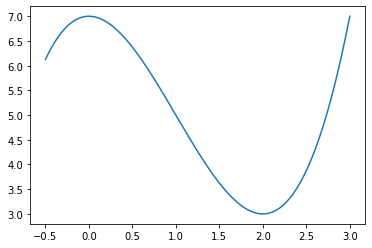

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f1 = lambda x: (x ** 3)-(3 *(x ** 2))+7

# Get 1000 evenly spaced num bers between -1 and 3 (arbitratil chosen to ensure steep curve)
x = np.linspace(-0.5,3,500)

# Plot the curve
plt.plot(x, f1(x))
plt.show()

In [ ]:
from scipy import optimize

result = optimize.minimize_scalar(f1)
print(result.success) # check if solver was successful

print('Minimum of function occurs at x = %.2f' % result.x)

True
Minimum of function occurs at x = 2.00


The concept of optimization is also applicable to functions of more than one variable.

In the following example, a function of two variables (a paraboloid in this case) is used to illustrate the optimization procedure.

Text(0.5, 0, 'y')

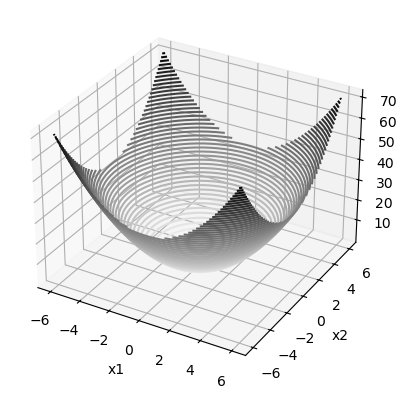

In [49]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def f_paraboloide(x1, x2):
    return x1 ** 2 + x2 ** 2

x1 = np.linspace(-6, 6, 30)
x2 = np.linspace(-6, 6, 30)

X1, X2 = np.meshgrid(x1, x2)
Y = f_paraboloide(X1, X2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Y, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

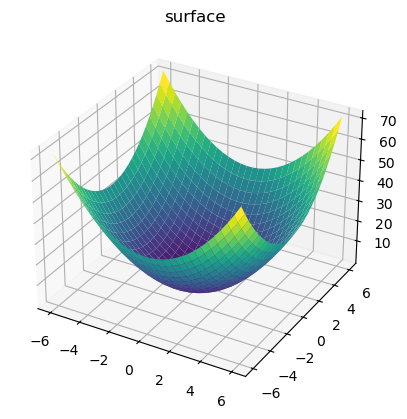

In [50]:
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [51]:
from scipy import optimize

def f2(x):
    return (x[0]**2 + x[1]**2)

optimize.minimize(f2, [2, -1], method="CG")

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 5.8281095370852615e-15
       x: [-6.828e-08  3.414e-08]
     nit: 1
     jac: [-1.217e-07  8.318e-08]
    nfev: 9
    njev: 3

In fact, much more complicate functions can be optimized. See the example below.

Text(0.5, 0, 'y')

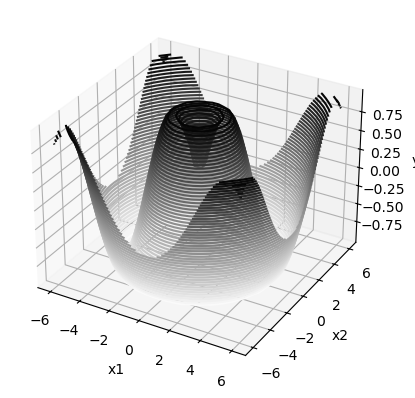

In [52]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def f(x1, x2):
    return np.sin(np.sqrt(x1 ** 2 + x2 ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X1, X2 = np.meshgrid(x, y)
Y = f(X1, X2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Y, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [53]:
from scipy import optimize

def f2(x):
    return (x[0]**2 + x[1]**2)

optimize.minimize(f2, [2, -1], method="CG")

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 5.8281095370852615e-15
       x: [-6.828e-08  3.414e-08]
     nit: 1
     jac: [-1.217e-07  8.318e-08]
    nfev: 9
    njev: 3

# Gradient Descent and its variants

There are numerous gradient-based optimization methods. The study of these methods is outside the scope of this course. In any case, the following animation ([source]((https://www.datasciencecentral.com/profiles/blogs/an-overview-of-gradient-descent-optimization-algorithms))) illustrates the behavior of some of these methods while minimizing a given function. Notice how some of these methods manage to scape the local minima, while some others remain stuck in it.

![alt text](http://storage.ning.com/topology/rest/1.0/file/get/2808327843?profile=original)

# The Learning Rate


In the update used by Gradient Descent  presented above, $\alpha$ is a numerical value called *learning rate*. This constant controls the amount of update on the components of $\Theta$.

The learning rate is a hyperparameter of both linear regression and logistic regression learning algorithm. You will also find this hyperparameters in artificial neural networks. The following animation (source: [Machine Learning Refined](https://github.com/jermwatt/machine_learning_refined)) illustrates the effect of different learning rate values ​​on the optimization process. When $\alpha$ is defined as too large and the evaluation sequence starts to get out of control, the sequence of steps is said to diverge. On the other hand, if the value of $\alpha$ is very small, the convergence of the process can take significantly.

![alt text](https://github.com/jermwatt/machine_learning_refined/blob/gh-pages/html/gifs/steplength_1D.gif?raw=true)

